In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Gaussian reconstruction error as a function of sampling rate and phase shift

In [141]:
# original Gaussian
sigma = 2
t_c = np.linspace(-10, 10, 2000)
t_shifts = np.linspace(-2.5, 2.5, 41)[:, np.newaxis]
gaussian_array = np.exp(-(t_c - t_shifts)**2/(2*sigma))/sigma


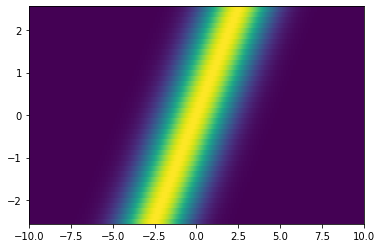

In [142]:
plt.pcolor(t_c, t_shifts, gaussian_array, shading='auto');

In [148]:
# downsample Gaussians using 2 methods
num_samped_points = 20
samp_time = 2000 // num_samped_points
t_disc1 = t_c[::samp_time]
t_disc2 = np.linspace(-10, 10, num_samped_points)
gaussian_array_disc1 = gaussian_array[:, ::samp_time]
gaussian_array_disc2 = np.exp(-(t_disc2- t_shifts)**2/(2*sigma))/sigma

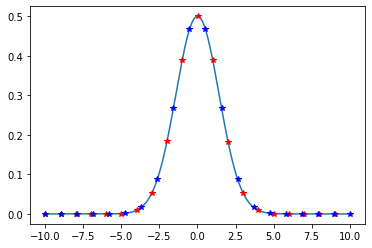

In [149]:
# compare
plt.plot(t_c, gaussian_array[20])
plt.plot(t_disc1, gaussian_array_disc1[20], 'r*')
plt.plot(t_disc2, gaussian_array_disc2[20], 'b*')

In [150]:
gaussian_array_reconst1 = np.repeat(gaussian_array_disc1, samp_time, axis=1)

In [151]:
# reconstruct
gaussian_array_reconst1 = np.repeat(gaussian_array_disc1, samp_time, axis=1)
gaussian_array_reconst2 = np.repeat(gaussian_array_disc2, samp_time, axis=1)

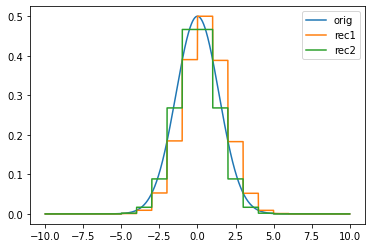

In [152]:
# compare - reconstructions are identical
pos = 20
plt.plot(t_c, gaussian_array[pos], label='orig')
plt.plot(t_c, gaussian_array_reconst1[pos], label='rec1')
plt.plot(t_c, gaussian_array_reconst2[pos], label='rec2')
plt.legend()

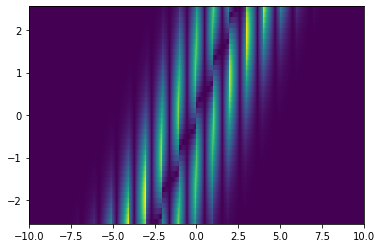

In [153]:
# look at reconstruction error
plt.pcolor(t_c, t_shifts, np.abs(gaussian_array - gaussian_array_reconst2), shading='auto');

Looks like the reconstruction error does not depend almost at all on the timeshift:

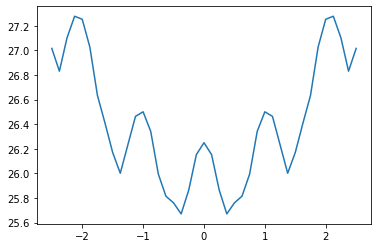

In [154]:
plt.plot(t_shifts, np.sum(np.abs(gaussian_array - gaussian_array_reconst2), axis=1));

In [158]:
# put everything in a function

def reconstuct_error_gaussian(sigma):
    num_samped_points = 50
    samp_time = 2000 // num_samped_points
    t_c = np.linspace(-10, 10, 2000)
    t_shifts = np.linspace(-0.5, 0.5, 11)[:, np.newaxis]
    gaussian_array = np.exp(-(t_c - t_shifts)**2/(2*sigma))/sigma
    t_disc2 = np.linspace(-10, 10, num_samped_points)
    gaussian_array_disc2 = np.exp(-(t_disc2 - t_shifts)**2/(2*sigma))/sigma
    gaussian_array_reconst2 = np.repeat(gaussian_array_disc2, samp_time, axis=1)
    reconstruct_error = np.squeeze(np.sum(np.abs(gaussian_array - gaussian_array_reconst2)[:]))
    return reconstruct_error

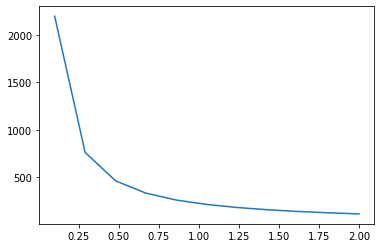

In [159]:
sigma_vec = np.linspace(0.1, 2, 11)
err_vec = [reconstuct_error_gaussian(sigma) for sigma in sigma_vec]
plt.plot(sigma_vec, err_vec)


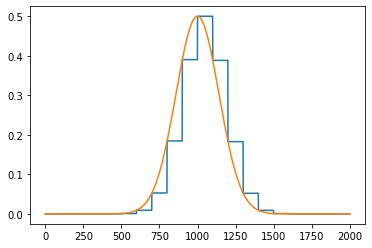

In [160]:
plt.plot(gaussian_array_reconst1[20].T);
plt.plot(gaussian_array[20])

# LPF the reconstruction error with a Butterworth filter

In [161]:
from scipy import signal

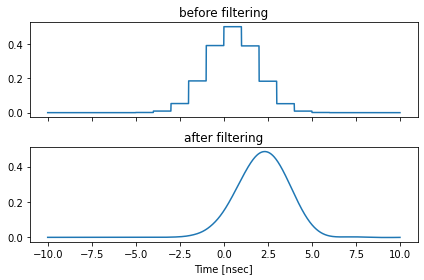

In [163]:
sig = gaussian_array_reconst1[20]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_c, sig)
ax1.set_title('before filtering')
sos = signal.butter(5, 0.3, 'lowpass', fs=100, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t_c, filtered)
ax2.set_title('after filtering')
ax2.set_xlabel('Time [nsec]')
plt.tight_layout()
plt.show()

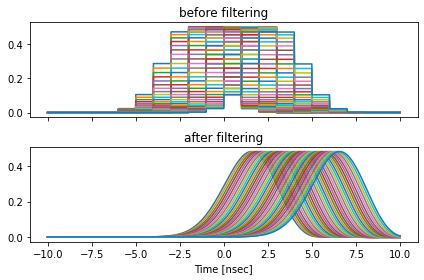

In [164]:
sig_vec = gaussian_array_reconst1
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t_c, sig_vec.T)
ax1.set_title('before filtering')
sos = signal.butter(10, 0.3, 'lowpass', fs=100, output='sos')
filtered = np.array([signal.sosfilt(sos, sig_vec[i]) for i in range(len(sig_vec))])
ax2.plot(t_c, filtered.T)
ax2.set_title('after filtering')
ax2.set_xlabel('Time [nsec]')
plt.tight_layout()
plt.show()

## Plot for demo

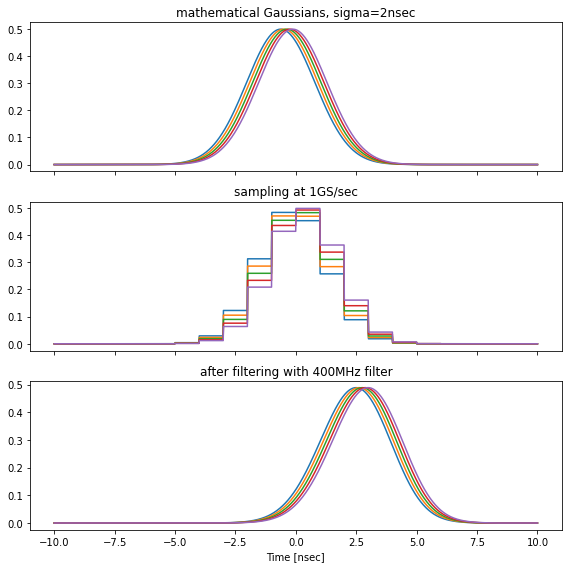

In [165]:
sig_vec_demo = gaussian_array_reconst1[15:20:1]
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax0.plot(t_c, gaussian_array[15:20:1].T)
ax0.set_title('mathematical Gaussians, sigma=2nsec')
ax1.plot(t_c, sig_vec_demo.T)
ax1.set_title('sampling at 1GS/sec')
sos = signal.butter(10, 0.4, 'lowpass', fs=100, output='sos')
filtered = np.array([signal.sosfilt(sos, sig_vec_demo[i]) for i in range(len(sig_vec_demo))])
ax2.plot(t_c, filtered.T)
ax2.set_title('after filtering with 400MHz filter')
ax2.set_xlabel('Time [nsec]')
plt.tight_layout()
plt.show()